# Natural Language Processing (NLP) - Sentiment Analysis 

## 1. Business Understanding

### Introduction

Harnessing the potential of sentiment analysis in the context of customer feedback on Twitter is a crucial move toward improving corporate expansion, making well-informed choices, and maximizing profitability. In this project, our goal is to thoroughly investigate the sentiment expressed by Twitter users in their feedback towards companies. We will achieve this by employing Natural Language Processing (NLP) methods to uncover the range of sentiments and their significant impact on businesses. Our data source for this project will be Dataworld.

### Main Objective

Develop a resilient model for sentiment analysis that assesses the sentiment of tweets by evaluating their content.

### Overview

This project's goal is to construct a multiclass sentiment analysis classifier for tweets. The primary aim is to assess and classify tweets into three sentiment categories: positive, neutral, and negative. This analysis provides the means for businesses and individuals to grasp public sentiment, track brand image, and make well-informed choices.

### Steps of building our design

Data understanding 

Visualizations

Data Preprocessing 

Model building: Neural Networks, Long Short Term Memory

Model evaluation 

Conclusion and Recommendation.

## 2. Data Understanding

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout, GlobalAveragePooling1D
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping
from wordcloud import WordCloud

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
# Loading the data set
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
#Renaming the columns into simpler words for better reading with ease
df.rename({"emotion_in_tweet_is_directed_at": 'company_brand', "is_there_an_emotion_directed_at_a_brand_or_product":'sentiment'}, axis=1, inplace=True)
df.head()

,tweet_text,company_brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
#checking the shape of our data
df.shape

(9093, 3)

In [6]:
#checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_text     9092 non-null   object
 1   company_brand  3291 non-null   object
 2   sentiment      9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
#checking the missing values in the data set and dealing with them
df.isnull().sum()

tweet_text          1
company_brand    5802
sentiment           0
dtype: int64

In [8]:
#dropping the rows with missing values(tweet_text)
df.dropna(subset=['tweet_text'], inplace=True)

## 3. Visualization 

Lets Visualize the distribution of sentiment classes in our dataset

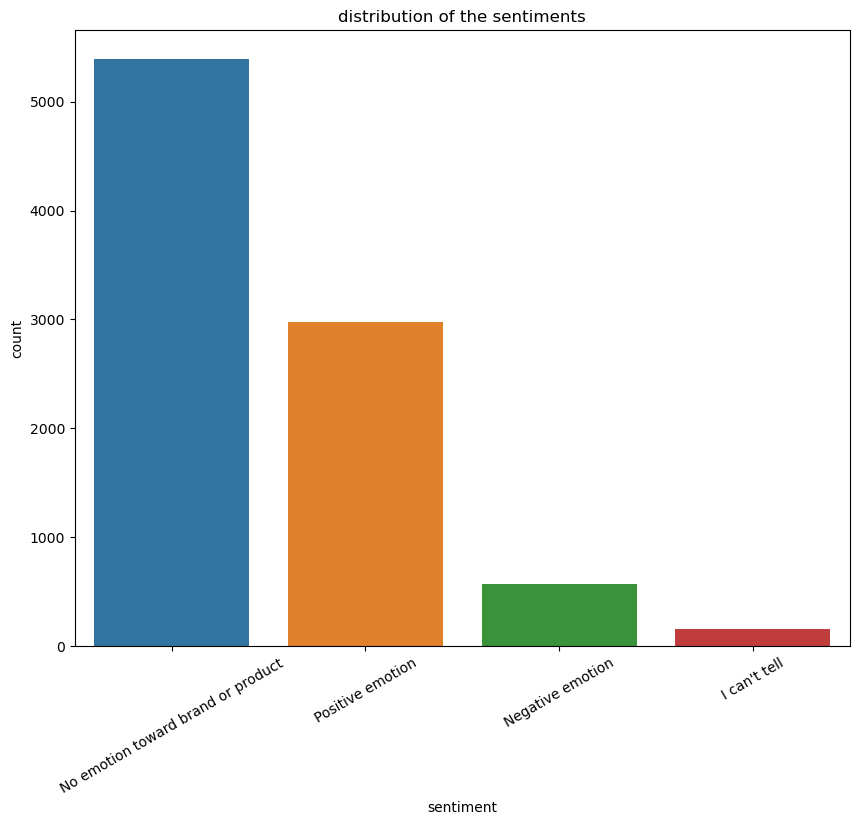

In [9]:
#distribution of the sentiments
plt.figure(figsize=(10,8))
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.title('distribution of the sentiments')
plt.xticks(rotation=30);

In [10]:
#Lets rename the "no emotion toward brand or product" and "I can't tell" sentiments to be neutral sentiments through mapping

mapping = {"No emotion toward brand or product" : "Neutral",
         "I can't tell" :  "Neutral",
           "Negative emotion":"Negative",
          "Positive emotion" : "Positive"}

df['sentiment'] = df.sentiment.replace(mapping)

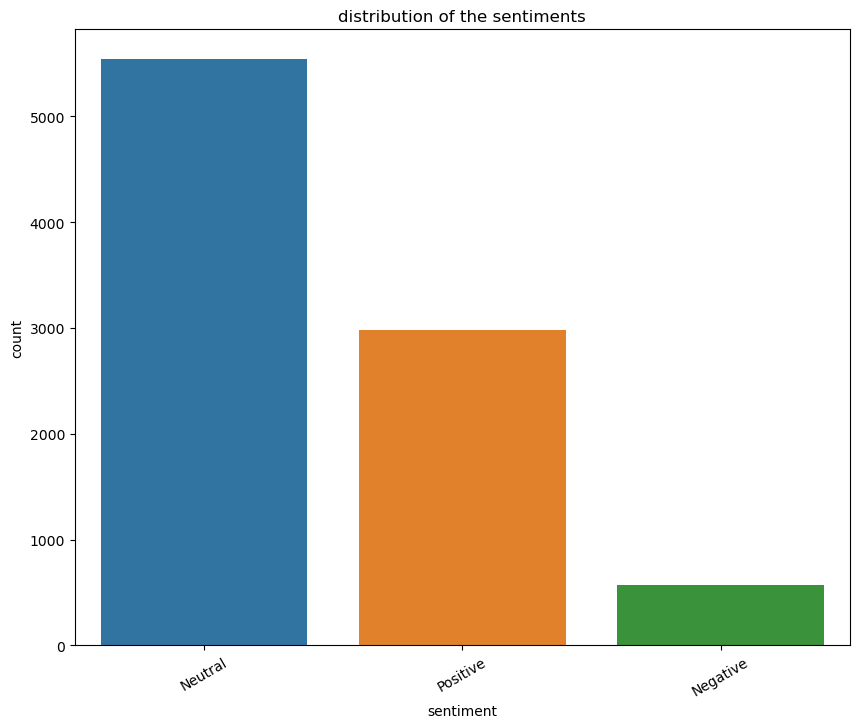

In [11]:
#distribution of the sentiments after mapping
plt.figure(figsize=(10,8))
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.title('distribution of the sentiments')
plt.xticks(rotation=30);

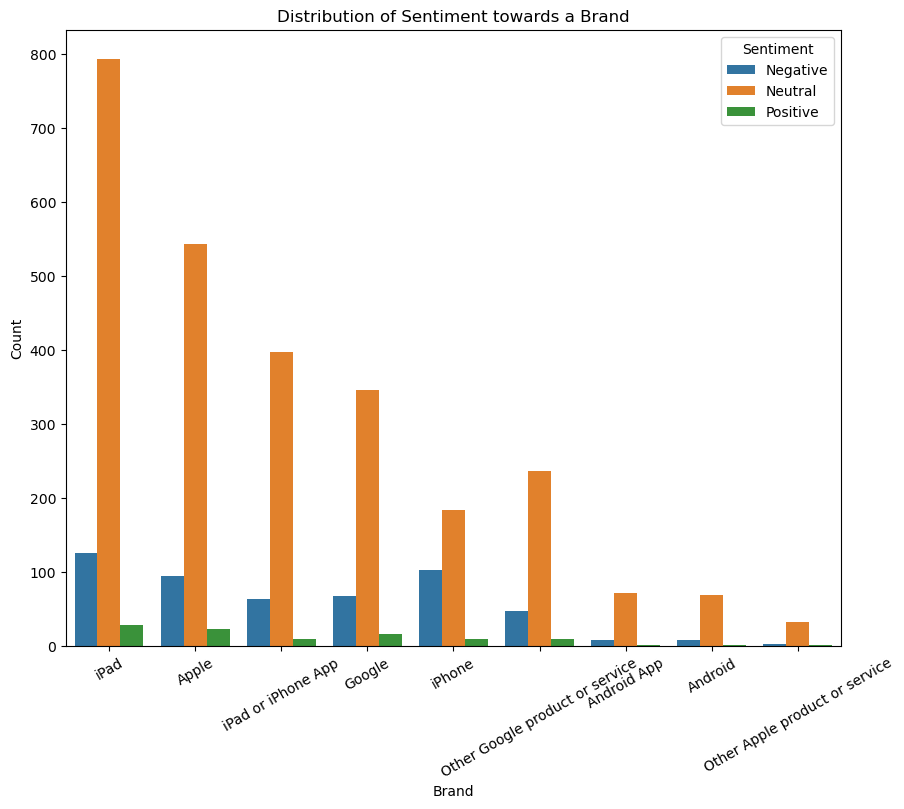

In [12]:
# Creating a countplot to show the distribution of sentiment towards brands
plt.figure(figsize=(10, 8))
sns.countplot(x='company_brand', hue='sentiment', data=df, order=df['company_brand'].value_counts().index)
plt.title('Distribution of Sentiment towards a Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])

plt.show()

From the plot above we can see that ipad as a rand had the highest number of feedbacks compared to the rest of the brands, with muuch of the feedback having a neutral feedback.

In [13]:
# Drop the brand column
df.drop('company_brand', axis=1, inplace=True)

Text(0.5, 1.0, 'Top 50 Most Frequently Occurring Words')

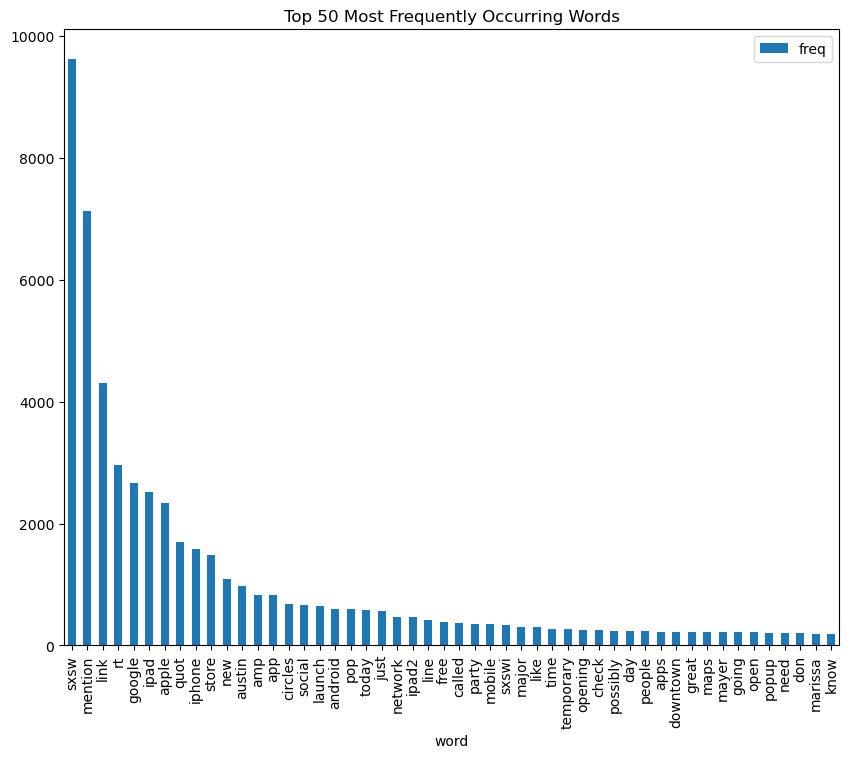

In [14]:
# Text preprocessing using CountVectorizer which will show the most occuring words in the tweets.
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['tweet_text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the most frequently occurring words
frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(10, 8))
plt.title("Top 50 Most Frequently Occurring Words")

Lets visually explore the most dominant words using the WordCloud

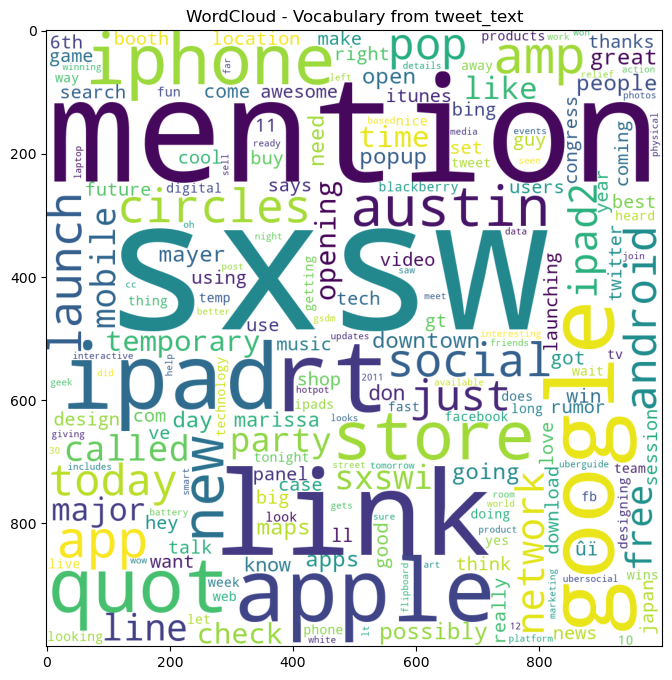

In [15]:
# Visualizing using WordCloud
wordcloud = WordCloud(background_color='white',width=1000, height=1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from tweet_text");

Let now make a copy of the original data before starting Data Preprocessing

In [16]:
#copy
data = df.copy()

## 4. Data Preprocessing

In [18]:
# Clean and preprocess the tweet_text
def preprocessing_text(text):
    # Remove mentions, URLs, and links
    text = re.sub(r'@[\w]*|http\S+|www\S+https\S+', " ", text)
    
    # Remove special characters except '#'
    text = re.sub(r'[^a-zA-Z#]', " ", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()
    
    # Apply stemming to each token (stemming is optional)
    stemmed_words = [stemmer.stem(word) for word in tokens]
    
    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    # Since 'not' might be an important word in sentiment analysis we will not remove it as a stopword
    stop_words.remove('not')
    
    # Remove stopwords from tokens
    filtered_text = [word for word in tokens if word not in stop_words]
    
    # Filter out words with a length less than 3 characters
    clean_text = [word for word in filtered_text if len(word) > 2]
    
    # Join the cleaned tokens back into a single string
    text = ' '.join(clean_text)
    
    return text



Lets apply the preprocessing_text function to the 'tweet_text' column and we compare the original tweet to the new tweet

In [21]:
# Apply the preprocessing_text function to the 'tweet_text' column
data['clean_tweet_text'] = df['tweet_text'].astype(str).apply(preprocessing_text)

In [22]:
# Check the original tweet
df['tweet_text'].iloc[0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [23]:
# check the processed data
data['clean_tweet_text'].iloc[0]

'iphone hrs tweeting rise austin dead need upgrade plugin stations sxsw'

Text(0.5, 1.0, 'Top 50 Most Frequently Occurring Words')

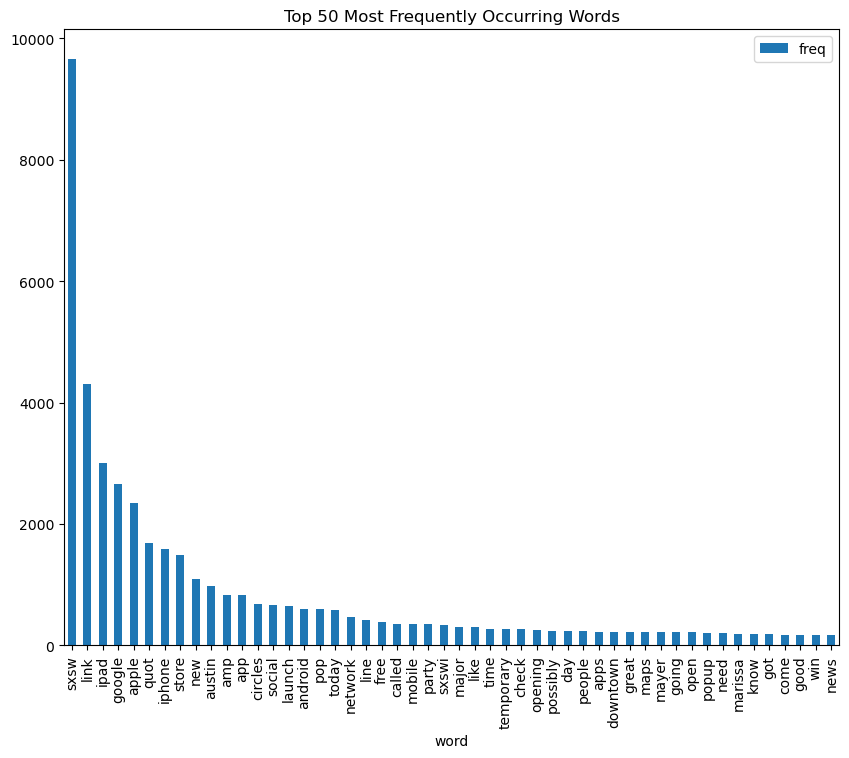

In [24]:
# Text preprocessing using CountVectorizer for the processed data
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data['clean_tweet_text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the most frequently occurring words
frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(10, 8),)
plt.title("Top 50 Most Frequently Occurring Words")

Preparing no the data for modelling by conversion from hman understandable form to a computer understandable data which is binay

In [25]:
# Initialize a tokenizer with a maximum vocabulary size of 5000 words and a special token for out-of-vocabulary words.
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')

# Fit the tokenizer on the preprocessed 'clean_tweet' column to build the vocabulary.
tokenizer.fit_on_texts(data['clean_tweet'])

# Retrieve the word-to-index mapping from the tokenizer.
word_index = tokenizer.word_index

# Convert the text data into numerical sequences using the tokenizer.
sequences = tokenizer.texts_to_sequences(data['clean_tweet'])

# Pad the sequences to a fixed length of 100, truncating any exceeding text ('post' truncation).
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')

In [26]:
sentiment_labels = pd.get_dummies(df['sentiment']).values

## 5. Modelling

In this secion we shall build two models and compare their accuracy to eac other and find the best performing Model. the two model in consideration are:

A. Neural Network model

B. Long Short Term Memory (LSTM)


In [27]:
# Split data to train and test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.25, random_state=42)

### A. Neural Network Model

In [32]:
# Initializing a Sequential model for the NLP sentiment analysis.
model = Sequential()

# Adding of an embedding layer
model.add(Embedding(1000, 100, input_length=100))

# Add a 1D convolutional layer with 64 filters and a kernel size of 5, using ReLU activation.
model.add(Conv1D(64, 5, activation='relu'))

# Apply global max-pooling to reduce the dimensionality.
model.add(GlobalMaxPooling1D())

# Add a dense layer with 32 units and ReLU activation.
model.add(Dense(32, activation='relu'))

# Apply dropout with a rate of 0.5 to prevent overfitting.
model.add(Dropout(0.5))

# Add the output layer with 3 units (for sentiment classes) and softmax activation.
model.add(Dense(3, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                      

In [33]:
# fitting the trained model using 10 epochs
history_base = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
214/214 [==============================] - 10s 31ms/step - loss: 0.8575 - accuracy: 0.6139 - val_loss: 0.8039 - val_accuracy: 0.6252
Epoch 2/10
214/214 [==============================] - 6s 29ms/step - loss: 0.7380 - accuracy: 0.6746 - val_loss: 0.7524 - val_accuracy: 0.6480
Epoch 3/10
214/214 [==============================] - 6s 29ms/step - loss: 0.6466 - accuracy: 0.7234 - val_loss: 0.7344 - val_accuracy: 0.6674
Epoch 4/10
214/214 [==============================] - 6s 28ms/step - loss: 0.5583 - accuracy: 0.7661 - val_loss: 0.7703 - val_accuracy: 0.6736
Epoch 5/10
214/214 [==============================] - 6s 29ms/step - loss: 0.4755 - accuracy: 0.8074 - val_loss: 0.8186 - val_accuracy: 0.6560
Epoch 6/10
214/214 [==============================] - 7s 33ms/step - loss: 0.4161 - accuracy: 0.8358 - val_loss: 0.8681 - val_accuracy: 0.6564


In [34]:
# lets do evaluation of the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

72/72 [==============================] - 1s 7ms/step
Accuracy: 0.6564012318521777


C:\Users\Hp\AppData\Local\Temp\ipykernel_13940\3504752157.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.8907371819019317)

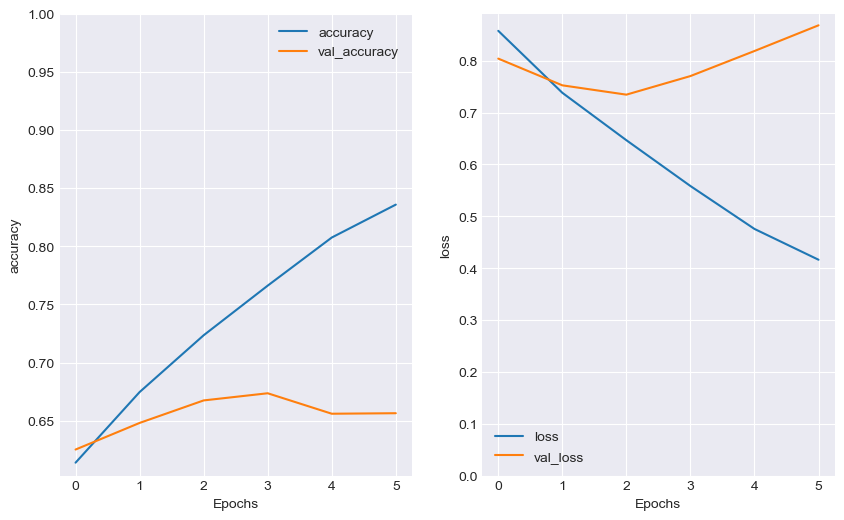

In [35]:
# Plot the training history of the Model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

we can observe overfitting so we try to tune the model to reduce overfitting and improve its accuracy

### Model Tuning

lets handle overfitting using regularization

In [36]:
# Handling overfitting using regularization
regularize = tf.keras.regularizers.l2(0.001)

model_reg = Sequential()
model_reg.add(Embedding(1000, 128, input_length=X_train.shape[1]))
model_reg.add(Dropout(0.3))
model_reg.add(GlobalAveragePooling1D())
model_reg.add(Dense(8, activation='relu', kernel_regularizer=regularize))
model_reg.add(Dropout(0.3))
model_reg.add(Dense(3, activation='softmax'))

# Compiling our model
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Fitting the Regularized Model
history_reg = model_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
214/214 [==============================] - 5s 17ms/step - loss: 0.8916 - accuracy: 0.5894 - val_loss: 0.8610 - val_accuracy: 0.5979
Epoch 2/10
214/214 [==============================] - 3s 15ms/step - loss: 0.8591 - accuracy: 0.6046 - val_loss: 0.8540 - val_accuracy: 0.5979
Epoch 3/10
214/214 [==============================] - 3s 16ms/step - loss: 0.8468 - accuracy: 0.6115 - val_loss: 0.8498 - val_accuracy: 0.5979
Epoch 4/10
214/214 [==============================] - 3s 16ms/step - loss: 0.8410 - accuracy: 0.6137 - val_loss: 0.8432 - val_accuracy: 0.5979
Epoch 5/10
214/214 [==============================] - 3s 16ms/step - loss: 0.8327 - accuracy: 0.6137 - val_loss: 0.8356 - val_accuracy: 0.5979
Epoch 6/10
214/214 [==============================] - 3s 16ms/step - loss: 0.8185 - accuracy: 0.6137 - val_loss: 0.8285 - val_accuracy: 0.5979
Epoch 7/10
214/214 [==============================] - 3s 15ms/step - loss: 0.8068 - accuracy: 0.6137 - val_loss: 0.8232 - val_accuracy: 0.5979

In [38]:
# Evaluate the model
y_pred = np.argmax(model_reg.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

72/72 [==============================] - 0s 3ms/step
Accuracy: 0.5978882534095908


C:\Users\Hp\AppData\Local\Temp\ipykernel_13940\951985553.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.8969563543796539)

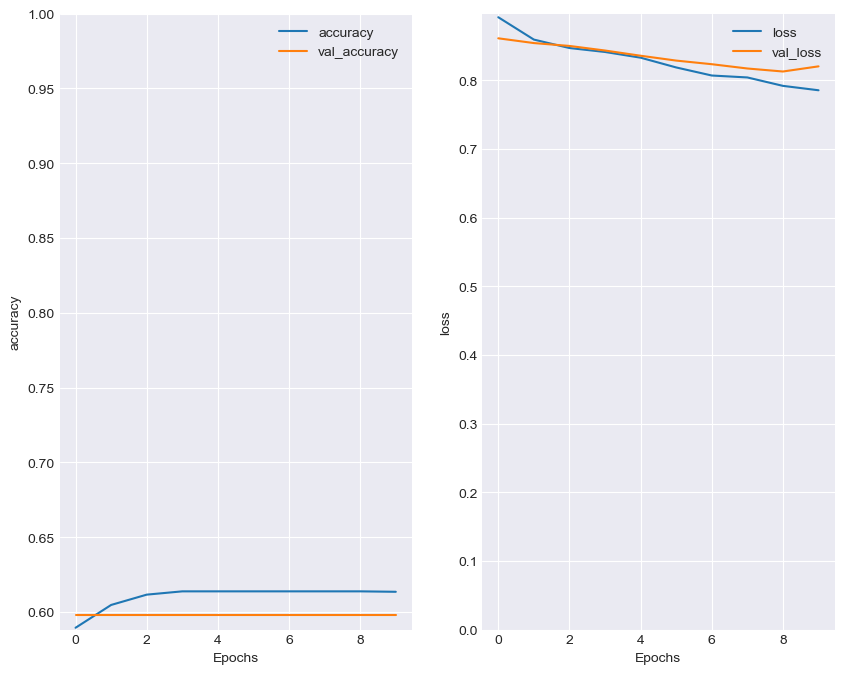

In [39]:
# Plot the training history of the Model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_reg, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_reg, 'loss')
plt.ylim(0, None)

72/72 [==============================] - 0s 5ms/step


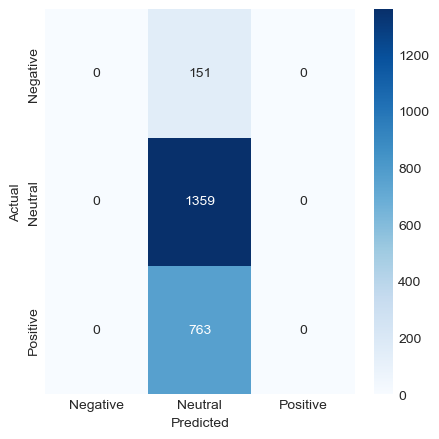

In [40]:
# Confusion Matrix
y_pred = model_reg.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])
y_test_labels = np.array([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_predicted_labels)

import seaborn as sn
labels = ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(5, 5))
sn.heatmap(cm, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As observed after tuning overfitting has been handled well

### B. Long Short Term Memory (LSTM)

In [42]:
# initialize the LSTM Model
model_lstm = Sequential([
    Embedding(10000, 128, input_length=X_train.shape[1]),
    Dropout(0.3),
    LSTM(32, kernel_constraint=max_norm(3)),
    Dense(32, activation='relu', kernel_regularizer=regularize),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compiling the LSTM Model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Fit the Model
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10


214/214 [==============================] - 25s 99ms/step - loss: 0.8608 - accuracy: 0.6109 - val_loss: 0.8197 - val_accuracy: 0.6309
Epoch 2/10
214/214 [==============================] - 22s 104ms/step - loss: 0.7328 - accuracy: 0.6803 - val_loss: 0.7636 - val_accuracy: 0.6560
Epoch 3/10
214/214 [==============================] - 20s 93ms/step - loss: 0.6622 - accuracy: 0.7142 - val_loss: 0.7701 - val_accuracy: 0.6590
Epoch 4/10
214/214 [==============================] - 20s 93ms/step - loss: 0.6276 - accuracy: 0.7337 - val_loss: 0.7778 - val_accuracy: 0.6516
Epoch 5/10
214/214 [==============================] - 20s 94ms/step - loss: 0.5896 - accuracy: 0.7462 - val_loss: 0.8299 - val_accuracy: 0.6599


In [44]:
# Evaluating the lstm model
y_pred = np.argmax(model_lstm.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

72/72 [==============================] - 2s 18ms/step
Accuracy: 0.6599208095028597


C:\Users\Hp\AppData\Local\Temp\ipykernel_13940\261643894.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.8743128925561905)

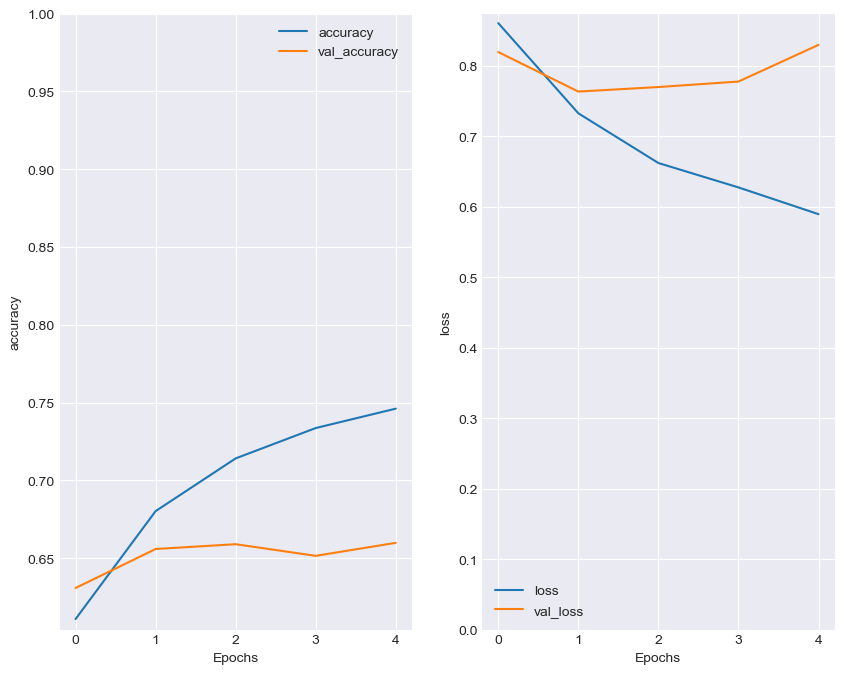

In [46]:
# Plotting the the LSTM model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

72/72 [==============================] - 1s 18ms/step


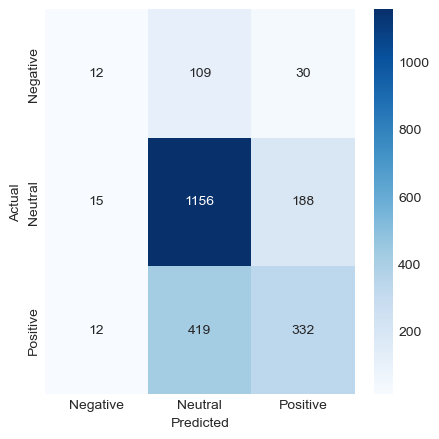

In [47]:
# Confusion Matrix for the LSTM Model
y_pred = model_lstm.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])
y_test_labels = np.array([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_test_labels, y_predicted_labels)

labels = ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(5, 5))
sn.heatmap(cm, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

we can observe that the LSTM model suffers overfitting too. we will tune the model too to seek improvement

### Model Tuning


In [48]:
# Tuning LSTM Model
model_lstm_1 = Sequential([
    Embedding(10000, 128, input_length=X_train.shape[1]),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compiling the Model
model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [49]:
history1 = model_lstm_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), 
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
214/214 [==============================] - 115s 489ms/step - loss: 0.8148 - accuracy: 0.6236 - val_loss: 0.7720 - val_accuracy: 0.6423
Epoch 2/10
214/214 [==============================] - 93s 436ms/step - loss: 0.6895 - accuracy: 0.6932 - val_loss: 0.7462 - val_accuracy: 0.6472
Epoch 3/10
214/214 [==============================] - 97s 452ms/step - loss: 0.6311 - accuracy: 0.7195 - val_loss: 0.7845 - val_accuracy: 0.6340
Epoch 4/10
214/214 [==============================] - 94s 437ms/step - loss: 0.5947 - accuracy: 0.7484 - val_loss: 0.7791 - val_accuracy: 0.6489
Epoch 5/10
214/214 [==============================] - 92s 432ms/step - loss: 0.5550 - accuracy: 0.7655 - val_loss: 0.8217 - val_accuracy: 0.6318


In [50]:
# Evaluating the model
y_pred = np.argmax(model_lstm_1.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

72/72 [==============================] - 10s 108ms/step
Accuracy: 0.6317641882974043


C:\Users\Hp\AppData\Local\Temp\ipykernel_13940\1538480230.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.8349998354911804)

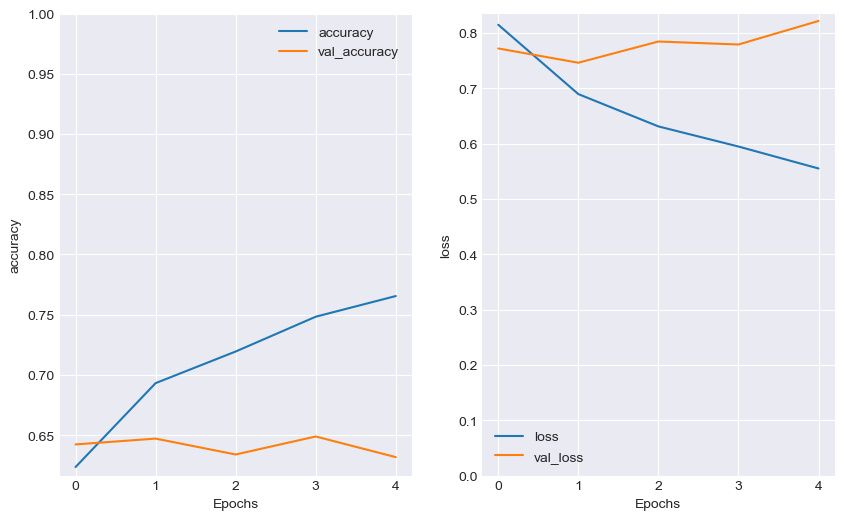

In [51]:
# Plotting the training history  Model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

72/72 [==============================] - 8s 109ms/step


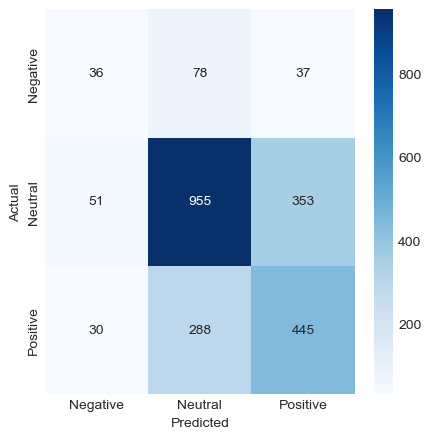

In [52]:
# Confusion Matrix for the Tuned LSTM Model
y_pred = model_lstm_1.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])
y_test_labels = np.array([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_test_labels, y_predicted_labels)

labels = ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(5, 5))
sn.heatmap(cm, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The LSTM model improves after tuning but still suffers overfitting.

Now lets compare the models and choose the best one

In [53]:
def evaluate_model(model, model_name):
    # Evaluating the model
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = accuracy_score(np.argmax(y_test, axis=-1), y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Evaluate each model
evaluate_model(model, "Baseline Model")
evaluate_model(model_reg, "Regularized Model")
evaluate_model(model_lstm, "LSTM Model")
evaluate_model(model_lstm_1, "Tuned Bidirectional LSTM Model")

72/72 [==============================] - 1s 8ms/step
Baseline Model Accuracy: 0.6564
72/72 [==============================] - 0s 4ms/step
Regularized Model Accuracy: 0.5979
72/72 [==============================] - 1s 18ms/step
LSTM Model Accuracy: 0.6599
72/72 [==============================] - 9s 122ms/step
Tuned Bidirectional LSTM Model Accuracy: 0.6318


lets visualize the perfomance of each model's training and testing loss and accuracy.

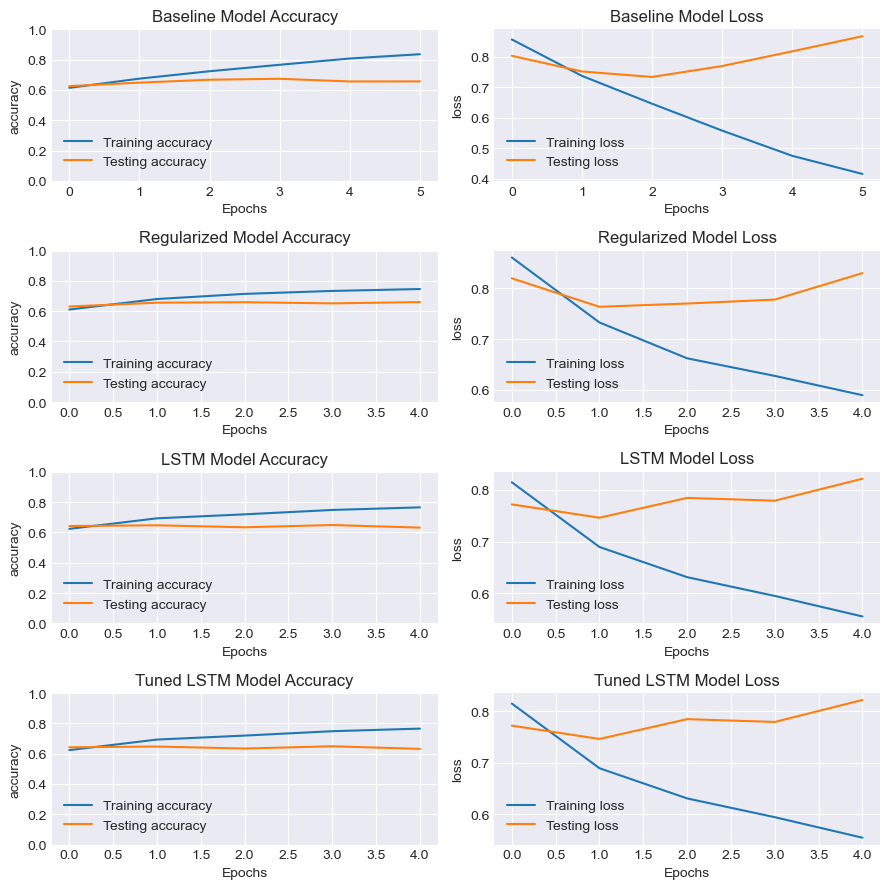

In [55]:
# Define a function to plot training and testing metrics
def plot_training_vs_testing_metrics(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history['val_' + metric], label=f'Testing {metric}')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()

# Create a figure for plotting
plt.figure(figsize=(9, 9))

# Plot training vs. testing metrics for each model
models = [
    ('Baseline Model', history_base),
    ('Regularized Model', history),
    ('LSTM Model', history1),
    ('Tuned LSTM Model', history1)
]

for i, (model_name, model_history) in enumerate(models, start=1):
    plt.subplot(4, 2, 2 * i - 1)
    plot_training_vs_testing_metrics(model_history, 'accuracy')
    plt.ylim(0, 1)
    plt.title(f'{model_name} Accuracy')

    plt.subplot(4, 2, 2 * i)
    plot_training_vs_testing_metrics(model_history, 'loss')
    plt.title(f'{model_name} Loss')

plt.tight_layout()
plt.show()

## 6. Conclusion
In this project, we considered various models for sentiment analysis of text data. We started with a basic model that uses neural networks (NNs) to store sequence information in text data.
We then experimented with more advanced models such as LSTM and tuned bidirectional LSTM to check if there is improvement of accuracy. Based on the accuracy results obtained above, the LSTM Model has an accuracy of 0.6599 which is the best of all.

## 7. Recommendation
To better enhance the model performance, we should consider exploring a model like Bidirectional Encoder Representations from Transformers(BERT), for sentiment analysis. The BERT models should have greater impact in NLP tasks which would or may result to even more better and accurate sentiment analysis results.